# <center> TP-03
<center> Subject : WR Analytics
<center> Group: I4-AMS-B <br><br>

<center> Team 04<br><br>

<center> Member:<br><br>

<center> LUN Tola, LAY Chhay, KRY Senghort, PHUONG Bunthoeun>

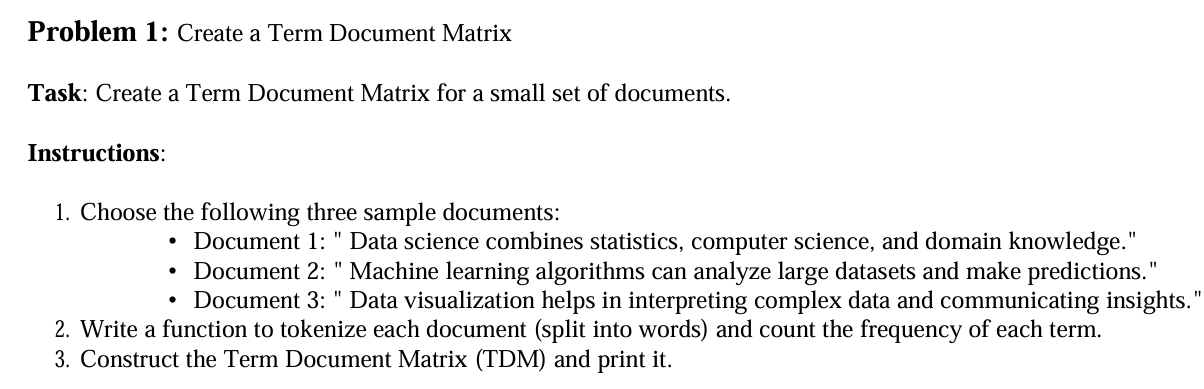

---
Problem 1: Create a Term Document Matrix

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [34]:
Document=[" Data science combines statistics, computer science, and domain knowledge.",
            " Machine learning algorithms can analyze large datasets and make predictions.",
            " Data visualization helps in interpreting complex data and communicating insights."
]

In [35]:
def create_term_document_matrix(docs):
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(docs)
    return pd.DataFrame(tdm.toarray(),columns= vectorizer.get_feature_names_out(), index=[f'Document{i+1}'
    for i in range (len(docs))])
tdm_df = create_term_document_matrix(Document)
tdm_df

,algorithms,analyze,and,can,combines,communicating,complex,computer,data,datasets,...,interpreting,knowledge,large,learning,machine,make,predictions,science,statistics,visualization
Document1,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,2,1,0
Document2,1,1,1,1,0,0,0,0,0,1,...,0,0,1,1,1,1,1,0,0,0
Document3,0,0,1,0,0,1,1,0,2,0,...,1,0,0,0,0,0,0,0,0,1


---
Problem 2: Visualize the Term Document Matrix
Task: Display the Term Document Matrix in a readable format.

In [36]:
display(tdm_df)

,algorithms,analyze,and,can,combines,communicating,complex,computer,data,datasets,...,interpreting,knowledge,large,learning,machine,make,predictions,science,statistics,visualization
Document1,0,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,2,1,0
Document2,1,1,1,1,0,0,0,0,0,1,...,0,0,1,1,1,1,1,0,0,0
Document3,0,0,1,0,0,1,1,0,2,0,...,1,0,0,0,0,0,0,0,0,1


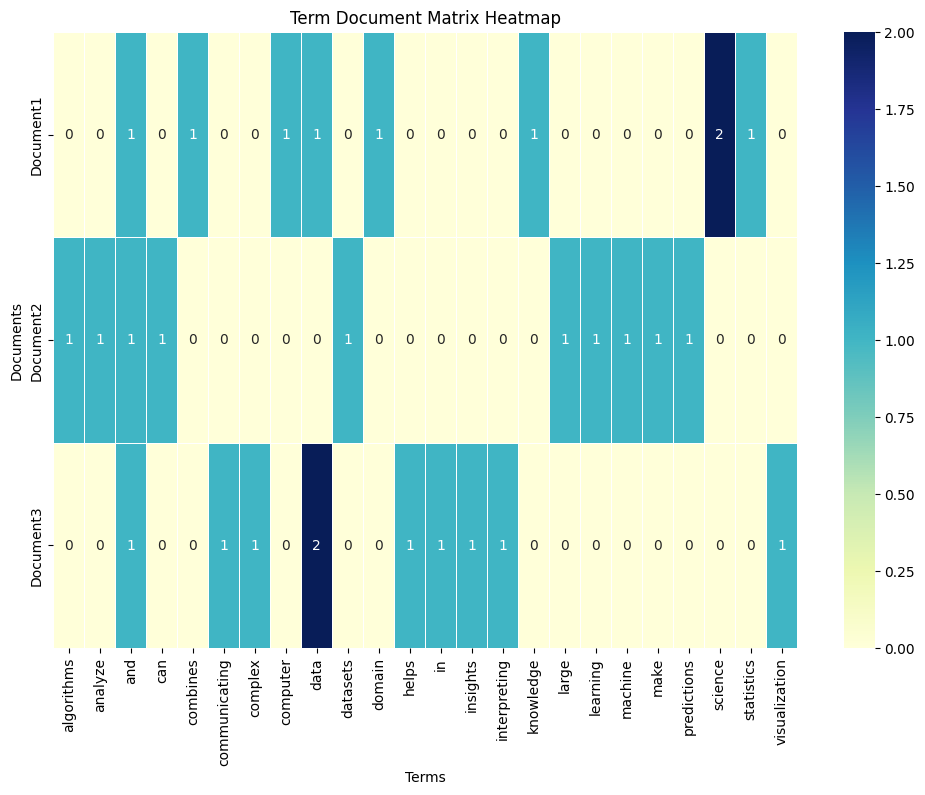

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
Document = [
    "Data science combines statistics, computer science, and domain knowledge.",
    "Machine learning algorithms can analyze large datasets and make predictions.",
    "Data visualization helps in interpreting complex data and communicating insights."
]

# Function to create Term Document Matrix
def create_term_document_matrix(docs):
    vectorizer = CountVectorizer()
    tdm = vectorizer.fit_transform(docs)
    return pd.DataFrame(tdm.toarray(), columns=vectorizer.get_feature_names_out(),
                        index=[f'Document{i+1}' for i in range(len(docs))])

# Create the term-document matrix
tdm_df = create_term_document_matrix(Document)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tdm_df, annot=True, cmap="YlGnBu", cbar=True, fmt="d", linewidths=.5)
plt.title("Term Document Matrix Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()


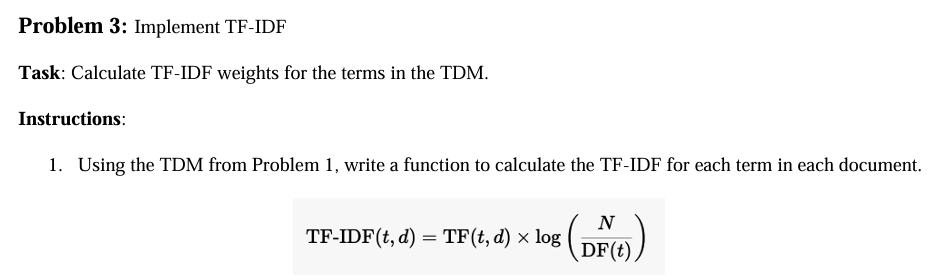

---
Problem 3: Implement TF-IDF
Task: Calculate TF-IDF weights for the terms in the TDM.


In [37]:
import numpy as np

def calculate_tfidf(tdm_df):
    N = len(tdm_df)  
    tf = tdm_df  
    df = np.where(tdm_df > 0, 1, 0).sum(axis=0)
    
    idf = np.log(N / df)
    tfidf = tf * idf
    
    return pd.DataFrame(tfidf, columns=tdm_df.columns, index=tdm_df.index)
tdm_df = create_term_document_matrix(Document)
tfidf_df = calculate_tfidf(tdm_df)
tfidf_df

,algorithms,analyze,and,can,combines,communicating,complex,computer,data,datasets,...,interpreting,knowledge,large,learning,machine,make,predictions,science,statistics,visualization
Document1,0.000000,0.000000,0.0,0.000000,1.098612,0.000000,0.000000,1.098612,0.405465,0.000000,...,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,1.098612,0.000000
Document2,1.098612,1.098612,0.0,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,...,0.000000,0.000000,1.098612,1.098612,1.098612,1.098612,1.098612,0.000000,0.000000,0.000000
Document3,0.000000,0.000000,0.0,0.000000,0.000000,1.098612,1.098612,0.000000,0.810930,0.000000,...,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612


In [38]:
display(tfidf_df)

,algorithms,analyze,and,can,combines,communicating,complex,computer,data,datasets,...,interpreting,knowledge,large,learning,machine,make,predictions,science,statistics,visualization
Document1,0.000000,0.000000,0.0,0.000000,1.098612,0.000000,0.000000,1.098612,0.405465,0.000000,...,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,1.098612,0.000000
Document2,1.098612,1.098612,0.0,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,...,0.000000,0.000000,1.098612,1.098612,1.098612,1.098612,1.098612,0.000000,0.000000,0.000000
Document3,0.000000,0.000000,0.0,0.000000,0.000000,1.098612,1.098612,0.000000,0.810930,0.000000,...,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612


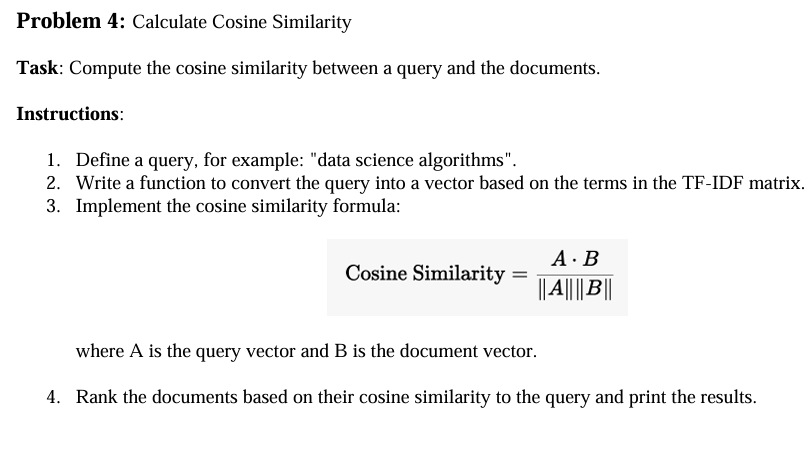

---
Problem 4: Calculate Cosine Similarity
Task: Compute the cosine similarity between a query and the documents


In [39]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the documents
Document = [
    "Data science combines statistics, computer science, and domain knowledge.",
    "Machine learning algorithms can analyze large datasets and make predictions.",
    "Data visualization helps in interpreting complex data and communicating insights."
]

# Initialize TfidfVectorizer and transform the documents
vectorizer = TfidfVectorizer()
tf_idf_df = pd.DataFrame(vectorizer.fit_transform(Document).toarray(), columns=vectorizer.get_feature_names_out())

# Function to vectorize a query
def vectorize_query(query):
    return pd.Series(vectorizer.transform([query]).toarray().flatten(), index=tf_idf_df.columns).reindex(tf_idf_df.columns, fill_value=0)

# Use the function to vectorize your query
query_vector = vectorize_query("data science algorithms")
query_vector

algorithms       0.622766
analyze          0.000000
and              0.000000
can              0.000000
combines         0.000000
communicating    0.000000
complex          0.000000
computer         0.000000
data             0.473630
datasets         0.000000
domain           0.000000
helps            0.000000
in               0.000000
insights         0.000000
interpreting     0.000000
knowledge        0.000000
large            0.000000
learning         0.000000
machine          0.000000
make             0.000000
predictions      0.000000
science          0.622766
statistics       0.000000
visualization    0.000000
dtype: float64

In [ ]:
def cosine_similarity(query_vector,tf_idf_df):
    query_norm=np.linalg.norm(query_vector)
    doc_norm=np.linalg.norm(tf_idf_df,axis=1)
    dot_product=np.dot(tf_idf_df,query_vector)
    cosine_similarities=dot_product/query_norm*doc_norm
    return cosine_similarities

cosine_similarities=cosine_similarity(query_vector,tf_idf_df)

# cosine_similarities.index=tf_idf_df.index
cosine_similarities

array([0.50963721, 0.20367904, 0.23176065])

In [41]:
ranked_documents=sorted(cosine_similarities,reverse=True)
print('Cosine Similary rankings:')
display(ranked_documents)

Cosine Similary rankings:


[0.5096372075432956, 0.23176064870726817, 0.2036790351415582]

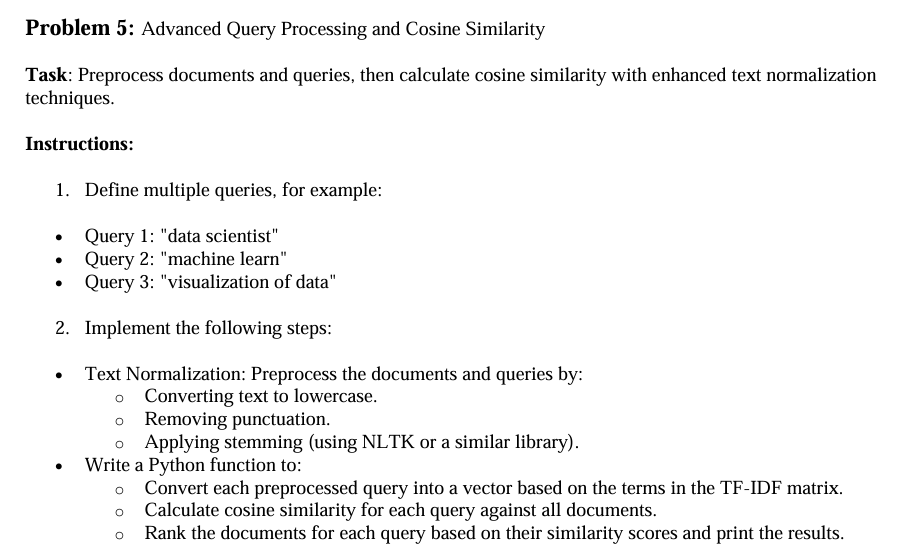

---
Problem5: Advanced Query Processing and Cosine Similarity Task: Preprocess documents and queries, then calculate cosine similarity with enhanced text normalization techniques. Instructions:

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.porter import PorterStemmer
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Rog
[nltk_data]     Strix\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
queries = [
    "data scientist",
    "machine learn",
    "visualization of data"
]

In [44]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Text normalization function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

In [45]:
# Preprocess documents
processed_documents = [preprocess_text(doc) for doc in Document]

# Preprocess queries
processed_queries = [preprocess_text(query) for query in queries]

# Display the processed documents and queries
print("Processed Documents:", processed_documents)
print("Processed Queries:", processed_queries)

Processed Documents: ['data scienc combin statist comput scienc domain knowledg', 'machin learn algorithm analyz larg dataset make predict', 'data visual help interpret complex data commun insight']
Processed Queries: ['data scientist', 'machin learn', 'visual data']


In [46]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Text normalization function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    # Join words back into a single string
    return ' '.join(words)

In [47]:
# Initialize TfidfVectorizer with preprocessed text
vectorizer = TfidfVectorizer()
# Fit and transform the processed documents
tfidf_matrix = vectorizer.fit_transform(processed_documents)

# Convert to a DataFrame for easier viewing
terms = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=[f"Document {i+1}" for i in range(len(processed_documents))], columns=terms)

# Display the TF-IDF matrix
print("TF-IDF Matrix:")
tfidf_df

TF-IDF Matrix:


,algorithm,analyz,combin,commun,complex,comput,data,dataset,domain,help,...,interpret,knowledg,larg,learn,machin,make,predict,scienc,statist,visual
Document 1,0.000000,0.000000,0.323112,0.000000,0.000000,0.323112,0.245735,0.000000,0.323112,0.000000,...,0.000000,0.323112,0.000000,0.000000,0.000000,0.000000,0.000000,0.646225,0.323112,0.000000
Document 2,0.353553,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,...,0.000000,0.000000,0.353553,0.353553,0.353553,0.353553,0.353553,0.000000,0.000000,0.000000
Document 3,0.000000,0.000000,0.000000,0.346821,0.346821,0.000000,0.527533,0.000000,0.000000,0.346821,...,0.346821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346821


In [48]:
# Transform queries into the TF-IDF space of the document terms
query_vectors = vectorizer.transform(processed_queries)

# Display query vectors in DataFrame format
query_tfidf_df = pd.DataFrame(query_vectors.toarray(), index=[f"Query {i+1}" for i in range(len(queries))], columns=terms)
print("Query TF-IDF Matrix:")
query_tfidf_df

Query TF-IDF Matrix:


,algorithm,analyz,combin,commun,complex,comput,data,dataset,domain,help,...,interpret,knowledg,larg,learn,machin,make,predict,scienc,statist,visual
Query 1,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Query 2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.000000
Query 3,0.0,0.0,0.0,0.0,0.0,0.0,0.605349,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.795961


In [49]:
# Initialize an empty dictionary to store similarity scores for each query
similarity_results = {}

# Compute cosine similarity for each query against all documents
for i, query_vector in enumerate(query_vectors):
    # Calculate similarity between the query and each document
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()
    # Store the results in the dictionary with the query as the key
    similarity_results[f"Query {i+1} ('{queries[i]}')"] = similarities

# Convert the results dictionary into a DataFrame for a tabular display
similarity_df = pd.DataFrame(similarity_results, index=[f"Document {j+1}" for j in range(len(Document))])

# Display the similarity scores in a table format
print("Cosine Similarity Scores:")
similarity_df


Cosine Similarity Scores:


,Query 1 ('data scientist'),Query 2 ('machine learn'),Query 3 ('visualization of data')
Document 1,0.245735,0.0,0.148755
Document 2,0.000000,0.5,0.000000
Document 3,0.527533,0.0,0.595397


In [4]:
documents = [
    "Data science combines statistics, computer science, and domain knowledge.",
    "Machine learning algorithms can analyze large datasets and make predictions.",
    "Data visualization helps in interpreting complex data and communicating insights."
]

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')

# Retrieve and print the list of all stop words
stop_words = vectorizer.get_stop_words()
print("All stop words in CountVectorizer:")
sorted(stop_words)

All stop words in CountVectorizer:


['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'do',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'fill',
 'find',
 'fire',
 'first',
 'five',
 'for'

### <center><b> The End !!! 